## Includes code from *Machine Learning with PyTorch and Scikit-Learn* by Sabastian Raschka, Yuxi (Hayden) Liu and Vahid Mirjalili, 2022, and from *Python Machine Learning*, by Sebastian Raschka and Vahid Mirjalili, 2019

Prepared for use in COSC-247 Machine Learning at Amherst College, Fall 2022, by Lee Spector (lspector@amherst.edu)

# Training LinearRegressionGD on the Ames housing dataset

In [12]:
import pandas as pd
import numpy as np


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [13]:
df.shape

(2930, 6)

In [14]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [15]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [16]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [17]:
# remove rows that contain missing values

df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [18]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

In [19]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [20]:
X

array([[1656],
       [ 896],
       [1329],
       ...,
       [ 970],
       [1389],
       [2000]], dtype=int64)

In [21]:
y

array([215000, 105000, 172000, ..., 132000, 170000, 188000], dtype=int64)

In [22]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [23]:
X_std

array([[ 0.30887979],
       [-1.19492198],
       [-0.33815071],
       ...,
       [-1.04849917],
       [-0.21942951],
       [ 0.98954796]])

In [24]:
y_std

array([ 0.42783926, -0.94949293, -0.11057241, ..., -0.61142048,
       -0.13561481,  0.08976682])

In [25]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

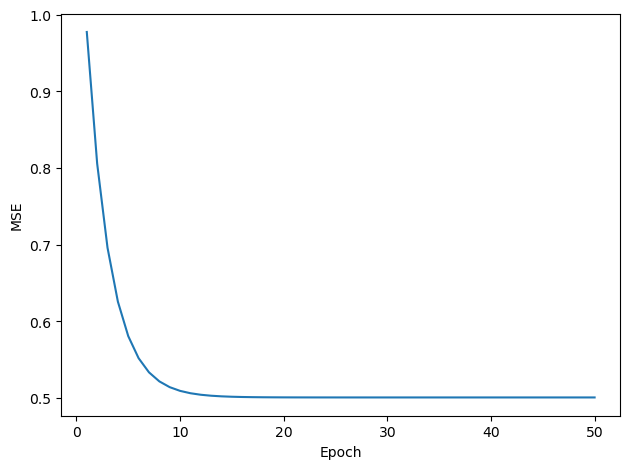

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()

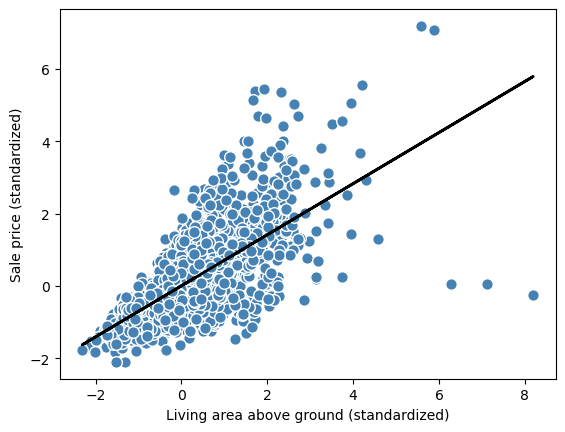

In [27]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

In [28]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


# Training sklearn's LinearRegression on the Ames housing dataset

In [29]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc_y.fit(y_train[:, np.newaxis])
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

##################

from sklearn.linear_model import LinearRegression

est = LinearRegression()
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.512, test: 0.499
R^2 train: 0.488, test: 0.515


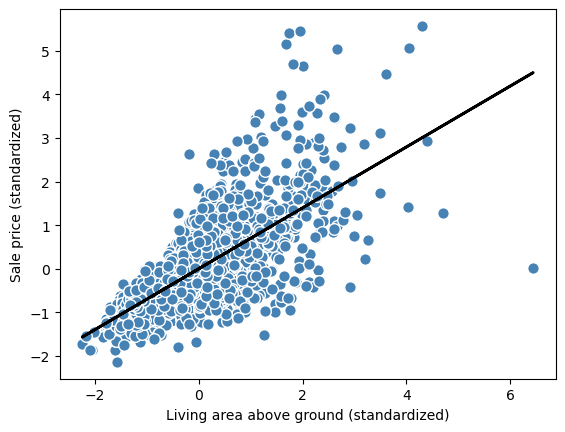

In [30]:
lin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

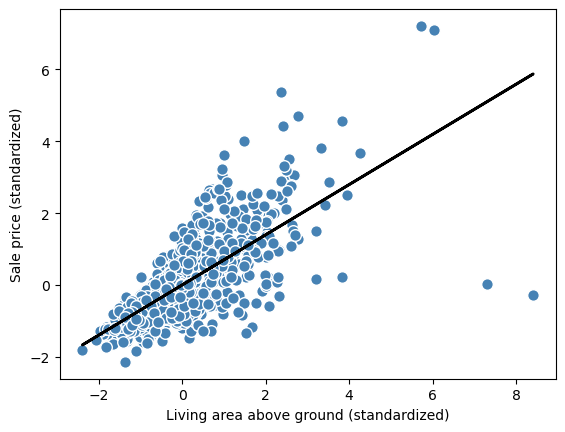

In [31]:
lin_regplot(X_test_std, y_test_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

# Training sklearn's RandomForestRegressor on the Ames housing dataset

In [32]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=1000, 
                            criterion='squared_error', 
                            random_state=1, 
                            n_jobs=-1)
est.fit(X_train_std, y_train_std)

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.211, test: 0.670
R^2 train: 0.789, test: 0.348


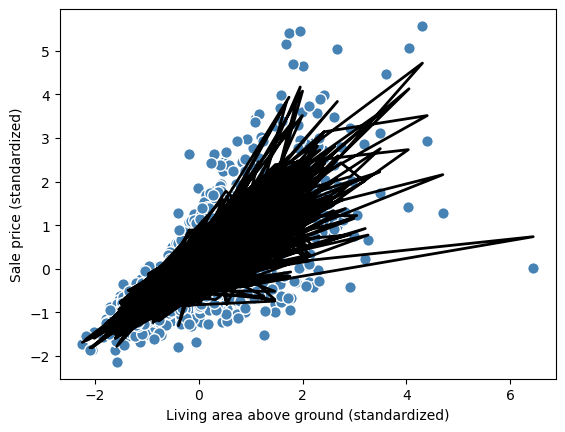

In [33]:
lin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

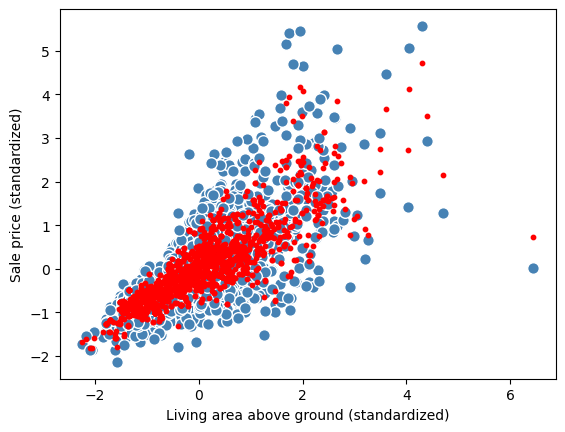

In [34]:
def nonlin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.scatter(X, model.predict(X), color='red', s=10)    
    return 

nonlin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()


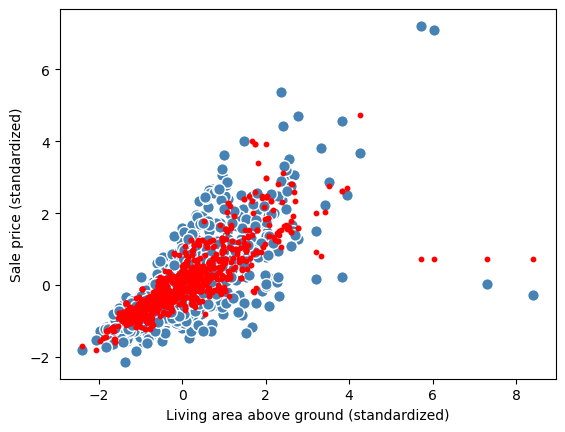

In [35]:
nonlin_regplot(X_test_std, y_test_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()


# Training gplearn on the Ames housing dataset

In [36]:
pip install gplearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from gplearn.genetic import SymbolicRegressor

est = SymbolicRegressor(population_size=1000,
                        init_depth=(4,6),
                        generations=100, stopping_criteria=0.01,
                        p_crossover=0.3, p_subtree_mutation=0.35,
                        p_hoist_mutation=0.0, p_point_mutation=0.35,
                        max_samples=1.0, verbose=1,
                        #const_range=None,
                        const_range=(-1.0,1.0),
                        tournament_size=5,
                        function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 
                                      'abs', 'neg', 'inv', 'max','min', 'sin', 'cos', 'tan'),
                        parsimony_coefficient=0.0001, random_state=0)
est.fit(X_train_std, y_train_std)

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    18.54          9.64932        8          0.50747              N/A      1.19m
   1    17.04          2.71667        8          0.50747              N/A      1.15m
   2    17.82          1.22409        4         0.505806              N/A      1.33m
   3    18.09          1.59415       24         0.494662              N/A      1.13m
   4    16.65          4.03051        8         0.493448              N/A      1.09m
   5    15.33          2.32012        8         0.492569              N/A      1.14m
   6    14.10         0.870503        8         0.492569              N/A      1.06m
   7    13.92          1.08876        8         0.492569              N/A     55.73s
   8    15.55          2.36781       13          0.49245              N/A  

In [38]:
print(est._program)

min(mul(add(-0.051, X0), neg(-0.649)), inv(abs(abs(tan(add(0.511, cos(X0)))))))


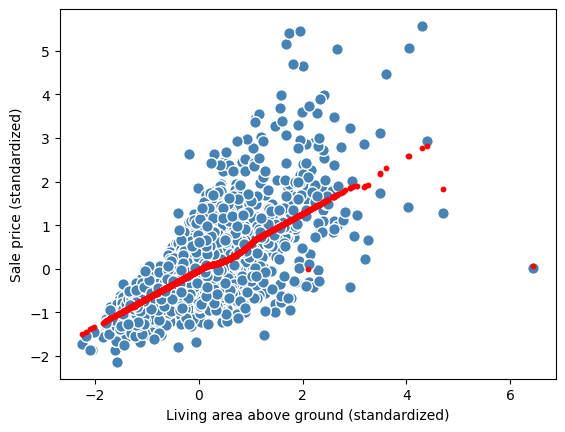

In [39]:
nonlin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

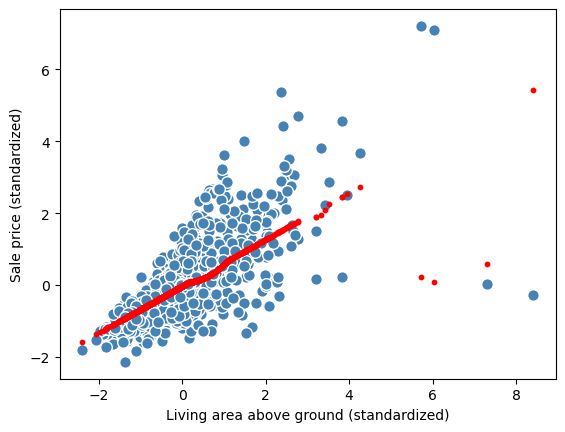

In [40]:
nonlin_regplot(X_test_std, y_test_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

# Artificial data from $$target = 2*sin(a)+b^2$$

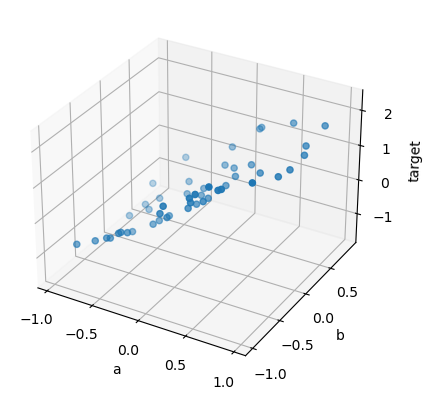

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d
plt.rcdefaults() 

import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([target_function(x[0], x[1]) for x in X])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[:,0], X[:,1], y)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('target')

#ax.view_init(30, 300) # default, or close
#ax.view_init(10, 280)
#ax.view_init(10, 340)

plt.show()

# Training gplearn on the artificial dataset

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

##################

from gplearn.genetic import SymbolicRegressor

est = SymbolicRegressor(population_size=1000,
                        init_depth=(4,6),
                        generations=100, stopping_criteria=0.01,
                        p_crossover=0.3, p_subtree_mutation=0.35,
                        p_hoist_mutation=0.0, p_point_mutation=0.35,
                        max_samples=1.0, verbose=1,
                        const_range=None,
                        #const_range=(-1.0,1.0),
                        tournament_size=5,
                        function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 
                                      'abs', 'neg', 'inv', 'max','min', 'sin', 'cos', 'tan'),
                        parsimony_coefficient=0.0001, random_state=0)
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    17.38          8.40878        2          0.41415              N/A     44.43s
   1    15.25          1.53809        4          0.41415              N/A     42.41s
   2    15.56           1.5832        3         0.353018              N/A     43.24s
   3    15.39          1.26539       38         0.346968              N/A     44.66s
   4    13.55          1.31843       12         0.287245              N/A     40.77s
   5    12.43          1.43881        7        0.0762943              N/A     41.01s
   6    12.85          1.30276        7        0.0762943              N/A     45.33s
   7    15.51          1.23835        7        0.0762943              N/A     40.24s
   8    19.37          2.78927        8        0.0381471              N/A  

In [43]:
print(est._program)

add(add(sin(X0), sin(X0)), mul(X1, X1))


# Training sklearn's RandomForestRegressor on the artificial dataset

In [44]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=1000, 
                            criterion='squared_error', 
                            random_state=1, 
                            n_jobs=-1)
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.012, test: 0.080
R^2 train: 0.990, test: 0.931


# Training sklearn's LinearRegression on the artificial dataset

In [45]:
from sklearn.linear_model import LinearRegression

est = LinearRegression()
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.077, test: 0.098
R^2 train: 0.931, test: 0.915


# Maybe check out:

- [EC-KitY](https://github.com/EC-KitY/EC-KitY): Evolutionary Computation Tool Kit in Python

- [PyshGP](https://github.com/erp12/pyshgp): Push Genetic Programming in Python